In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Loading the dataset from Google Drive
Dataset consists around of,
   100,000 of sarcasm data
   23,000 of irony data
   1,000 of idiom data               

In [ ]:
import urllib.request
import csv
import pandas as pd

Dataset = pd.read_csv("/content/gdrive/MyDrive/Datasets/LinguisticData.csv")

Example of loaded dataset

In [ ]:
Dataset.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,comment,label
0,100000,0,0,But they'll have all those reviews!,sarcasm
1,100001,1,1,wow it is totally unreasonable to assume that ...,sarcasm
2,100002,2,2,Ho ho ho... But Melania said that there is no ...,sarcasm
3,100003,3,3,I can't wait until @potus starts a twitter war...,sarcasm
4,100004,4,4,gotta love the teachers who give exams on the ...,sarcasm


Mapping the label class with numerical numbers for better understanding

In [ ]:
df = Dataset[['comment','label']]


encoded_dict = {'sarcasm':0, 'irony':1, 'idiom':2}

df['label'] = df.label.map(encoded_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Example of new dataset after the mappiing has added to label class

In [ ]:
df.head()

,comment,label
0,But they'll have all those reviews!,0
1,wow it is totally unreasonable to assume that ...,0
2,Ho ho ho... But Melania said that there is no ...,0
3,I can't wait until @potus starts a twitter war...,0
4,gotta love the teachers who give exams on the ...,0


Removing the duplicated rows from the dataset

In [ ]:
df = df[~df.duplicated()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118883 entries, 0 to 122107
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   comment  118883 non-null  object
 1   label    118883 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


Turn the whole dataset into lowercase characters. 

In [ ]:
import re
import numpy as np


df = df[df['comment'].notnull()]
df['comment'].replace('',np.nan,inplace=True)

df['comment'] = df['comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['comment'].head()

0                  but they'll have all those reviews!
1    wow it is totally unreasonable to assume that ...
2    ho ho ho... but melania said that there is no ...
3    i can't wait until @potus starts a twitter war...
4    gotta love the teachers who give exams on the ...
Name: comment, dtype: object

Remove all the punctuations in the dataset

In [ ]:
df['comment'] = df['comment'].str.replace('[^\w\s]','')
df['comment'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0                    but theyll have all those reviews
1    wow it is totally unreasonable to assume that ...
2    ho ho ho but melania said that there is no way...
3    i cant wait until potus starts a twitter war a...
4    gotta love the teachers who give exams on the ...
Name: comment, dtype: object

Remove emojis and emoticons from the dataset

In [ ]:
def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

df['comment'] = df['comment'].apply(lambda x: remove_emoji(x))
df = df[df['comment'].notnull()]
df['comment'].replace('',np.nan,inplace=True)

Example of label class values

In [ ]:
df['label'].value_counts()

0    96799
1    21414
2      670
Name: label, dtype: int64

Divide the dataset into training data and testing data. traning data is got 0.8 from whole dataset and testing data got  0.2 from dataset. 

all the nal values from the dataset has been removed. 

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df =  train_test_split(df,test_size=0.2, shuffle=True,stratify=df['label'])

train_df = train_df.dropna()
test_df = test_df.dropna()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95091 entries, 90627 to 63096
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  95091 non-null  object
 1   label    95091 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
train_df['label'].value_counts()

0    77424
1    17131
2      536
Name: label, dtype: int64

In [ ]:
test_df['label'].value_counts()

0    19358
1     4283
2      134
Name: label, dtype: int64

In [ ]:
train_df.comment.shape, train_df.label.shape

((95091,), (95091,))

Balancing class weights to minimize data imbalance between 3 classes. minority class set to a higher class weight while reducing the weight for the majority class. 

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced' ,classes=np.unique(train_df.label),y=train_df.label)

class_weights = dict(zip(np.unique(train_df.label), class_weights))

Convert the label class of both traning and testing data into categorical column. 

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(train_df.label)
y_test = to_categorical(test_df.label)

print(y_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Installing transformers

In [ ]:
!pip install transformers
import transformers

     |████████████████████████████████| 4.0 MB 5.6 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
     |████████████████████████████████| 880 kB 44.3 MB/s 
     |████████████████████████████████| 6.6 MB 36.5 MB/s 
     |████████████████████████████████| 596 kB 46.5 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=45742fb05132cfbda5c35d4173ccd710ad8f706db675eda8f6ce273b9ec443f4
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Loading the BERT model and BERT auto tokenizer from the transformer package. Both using the bert-base-cased models. 

In [ ]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95091 entries, 90627 to 63096
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  95091 non-null  object
 1   label    95091 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23775 entries, 3142 to 5152
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  23775 non-null  object
 1   label    23775 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 557.2+ KB


In [ ]:
train_df = train_df.dropna()
test_df = test_df.dropna()

Example of how many data are left in the training data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95091 entries, 90627 to 63096
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  95091 non-null  object
 1   label    95091 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ MB


Example of how many data are left in the testing data

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23775 entries, 3142 to 5152
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  23775 non-null  object
 1   label    23775 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 557.2+ KB


Converting input textual data into BERT's input data format using a tokenizer.

In [ ]:
x_train = tokenizer(
    text=train_df.comment.tolist(),
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
x_test = tokenizer(
    text=test_df.comment.tolist(),
    add_special_tokens=True,
    max_length=100,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

tokenizer will return a dictionary of containing 'Input_ids', 'attention_mask' 

In [ ]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [ ]:
x_test['input_ids']

<tf.Tensor: shape=(23775, 100), dtype=int32, numpy=
array([[  101,   178,  1928, ...,     0,     0,     0],
       [  101,  2654,  1152, ...,     0,     0,     0],
       [  101,  9193,   102, ...,     0,     0,     0],
       ...,
       [  101,   178,  1400, ...,     0,     0,     0],
       [  101,  1499,  1479, ...,     0,     0,     0],
       [  101, 21718,  1358, ...,     0,     0,     0]], dtype=int32)>

In [ ]:
x_train['input_ids']

<tf.Tensor: shape=(95091, 100), dtype=int32, numpy=
array([[  101,   192,  4064, ...,     0,     0,     0],
       [  101,  1209,  1103, ...,     0,     0,     0],
       [  101,  1272, 11730, ...,     0,     0,     0],
       ...,
       [  101,  1299,  1240, ...,     0,     0,     0],
       [  101,  1136,  1612, ...,     0,     0,     0],
       [  101,  2993, 14822, ...,     0,     0,     0]], dtype=int32)>

Importiing libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

Model Building

Functional API from Keras has been used to design the model. 

For the BERT layer it will need two input layers which are input_ids, attention_mask

Embeddings contains the hidden layers of the BERT layer. 

GlobalMaxPooling1D then dense layer will be used to build the CNN layers. 

In [ ]:
max_len = 100
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert.bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(3,activation = 'sigmoid')(out)
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

Defining learning parameters and compilling the model

In [ ]:
optimizer = Adam(
    learning_rate=5e-05, 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss =CategoricalCrossentropy(from_logits = True)
metric = CategoricalAccuracy('balanced_accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

Training the model

In [ ]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, y_test
    ),
  epochs=5,
    batch_size=36,
    class_weight=class_weights
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2642/2642 [==============================] - 3995s 2s/step - loss: 0.5002 - balanced_accuracy: 0.9775 - val_loss: 0.1186 - val_balanced_accuracy: 0.9753
Epoch 2/5
2642/2642 [==============================] - 3954s 1s/step - loss: 0.2380 - balanced_accuracy: 0.9893 - val_loss: 0.0847 - val_balanced_accuracy: 0.9830
Epoch 3/5
2642/2642 [==============================] - 3953s 1s/step - loss: 0.1764 - balanced_accuracy: 0.9906 - val_loss: 0.0724 - val_balanced_accuracy: 0.9857
Epoch 4/5
2642/2642 [==============================] - 3959s 1s/step - loss: 0.1562 - balanced_accuracy: 0.9912 - val_loss: 0.0688 - val_balanced_accuracy: 0.9865
Epoch 5/5
2642/2642 [==============================] - 3949s 1s/step - loss: 0.1398 - balanced_accuracy: 0.9921 - val_loss: 0.0667 - val_balanced_accuracy: 0.9871


In [ ]:
!mkdir -p saved_model
model.save('/content/gdrive/MyDrive/saved_model/my_model4')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/saved_model/my_model4/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/saved_model/my_model4/assets


Model Evaluation

Testing the model on the test data

In [ ]:
predicted_raw = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
predicted_raw[0]

array([0.9555353 , 0.2201088 , 0.13318232], dtype=float32)

In [ ]:
y_predicted = np.argmax(predicted_raw, axis = 1)
y_true = test_df.label

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19358
           1       0.98      0.98      0.98      4283
           2       0.53      0.63      0.58       134

    accuracy                           0.99     23775
   macro avg       0.83      0.87      0.85     23775
weighted avg       0.99      0.99      0.99     23775



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true, y_predicted)
matrix

array([[19188,    99,    71],
       [   83,  4197,     3],
       [   50,     0,    84]])

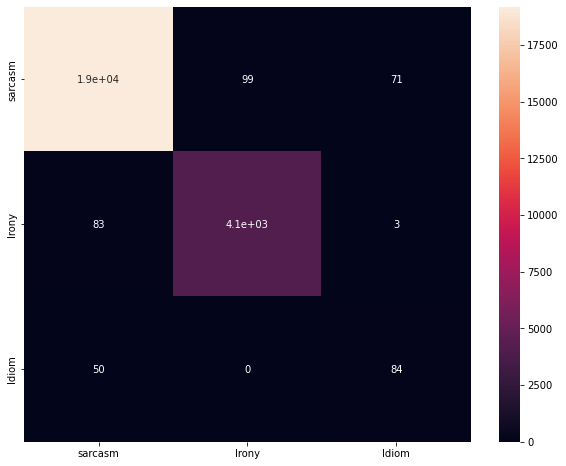

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

cfm = [[19188, 99, 71],
       [83, 4107, 3],
       [50, 0, 84]]
classes = ["sarcasm","Irony","Idiom"]

df_cfm = pd.DataFrame(cfm, index = classes, columns=classes)
plt.figure(figsize= (10,8))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("cfm1.png")